In [1]:
from datumaro import Dataset
from otx.core.data.dataset.detection import OTXDetectionDataset
import torch
from torchvision.transforms import v2

torch.manual_seed(3003)

transforms = v2.Compose(
    [
        v2.RandomResizedCrop(size=(224, 224), antialias=True),
        v2.RandomHorizontalFlip(p=0.5),
        v2.SanitizeBoundingBoxes(min_size=40),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

dm_dataset = Dataset.import_from("../tests/assets/car_tree_bug")
dataset = OTXDetectionDataset(
    dm_subset=dm_dataset.get_subset("train"), transforms=transforms
)


/home/vinnamki/otx/training_extensions/src/otx/core/data/mem_cache.py:231: UserWarning: Before calling MemCacheHandlerSingleton.get(), you should call MemCacheHandlerSingleton.create() first.
  warnings.warn(message=msg, stacklevel=1)


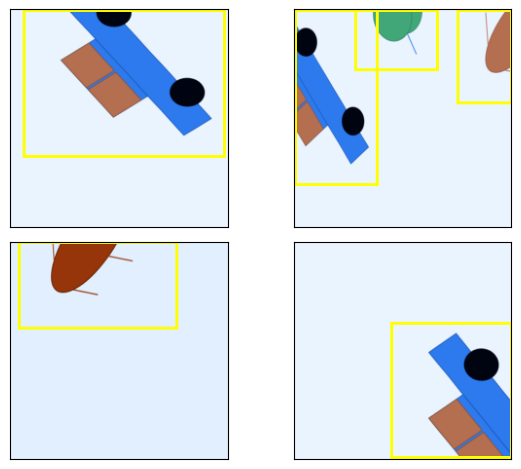

In [2]:
from helpers import plot


def to_plot_format(item):
    return item.image, {"boxes": item.bboxes}


# Plot 2x2 same dataset items but augmented randomly
plot(
    [
        [to_plot_format(dataset[0]), to_plot_format(dataset[0])],
        [to_plot_format(dataset[0]), to_plot_format(dataset[0])],
    ]
)
